- Younes LAKSIR
- Mohamed Reda BOUATAOUI
- Hamza ElAtifi

G3_09

- Top 5 des meilleures catégories.

In [39]:
import pandas as pd
from collections import Counter

df = pd.read_csv('netflix.csv')

categories = df['listed_in']

all_categories = [category for categories_str in categories for category in categories_str.split(',')]

category_counts = Counter(all_categories)

top_categories = category_counts.most_common(5)

for category, count in top_categories:
    print(f"{category}")


 International Movies
Dramas
Comedies
Action & Adventure
Documentaries


• Top 5 des réalisateurs.

In [40]:
import pandas as pd
from collections import Counter

df = pd.read_csv('netflix.csv')

realisateurs = df['director']

realisateurs = realisateurs.dropna()

tous_realisateurs = [realisateur for liste_realisateurs in realisateurs for realisateur in liste_realisateurs.split(',')]

comptes_realisateurs = Counter(tous_realisateurs)

top_realisateurs = comptes_realisateurs.most_common(5)

for realisateur, compte in top_realisateurs:
    print(f"{realisateur}")


Rajiv Chilaka
Raúl Campos
 Jan Suter
Suhas Kadav
Marcus Raboy


• Les dix meilleurs acteurs

In [41]:
import pandas as pd
from collections import Counter

df = pd.read_csv('netflix.csv')

acteurs = df['cast']

acteurs = acteurs.dropna()

tous_acteurs = [acteur for liste_acteurs in acteurs for acteur in liste_acteurs.split(',')]

comptes_acteurs = Counter(tous_acteurs)

top_acteurs = comptes_acteurs.most_common(10)

for acteur, compte in top_acteurs:
    print(f"{acteur}")

 Anupam Kher
 Rupa Bhimani
 Takahiro Sakurai
 Julie Tejwani
 Om Puri
 Rajesh Kava
Shah Rukh Khan
 Andrea Libman
 Yuki Kaji
 Boman Irani


• Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

In [42]:
import pandas as pd

df = pd.read_csv('netflix.csv')

tv_shows = df[df['type'] == 'TV Show']

tv_shows = tv_shows.assign(season_count=tv_shows['duration'].str.extract(r'(\d+) Season', expand=False).fillna(1).astype(int))

season_counts = tv_shows.groupby('title')['season_count'].max().reset_index()

season_counts = season_counts.sort_values('season_count', ascending=False)

top_5_tv_shows = season_counts.head(5)
print("Les 5 meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_5_tv_shows)

Les 5 meilleures séries télévisées avec le plus grand nombre de saisons :
               title  season_count
843   Grey's Anatomy            17
1475            NCIS            15
1999    Supernatural            15
1745    Red vs. Blue            13
891        Heartland            13


• Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df = pd.read_csv('netflix.csv')

df['description'] = df['description'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_similar_content(title, cosine_sim=cosine_sim):
    indices = pd.Series(df.index, index=df['title'])
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    content_indices = [i[0] for i in sim_scores]
    return df.iloc[content_indices]

similar_content = get_similar_content('Stranger Things')
print(similar_content[['title', 'type', 'release_year']])

                         title     type  release_year
4733             Rowdy Rathore    Movie          2012
1240                Safe Haven    Movie          2013
1487           Sakho & Mangane  TV Show          2019
8198   The Autopsy of Jane Doe    Movie          2016
2419             Big Stone Gap    Movie          2014
6518          Come and Find Me    Movie          2016
6760                 FirstBorn    Movie          2016
8026           Sinister Circle    Movie          2017
4201               Hardy Bucks  TV Show          2018
1270  Sin senos sí hay paraíso  TV Show          2018


• Netflix se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

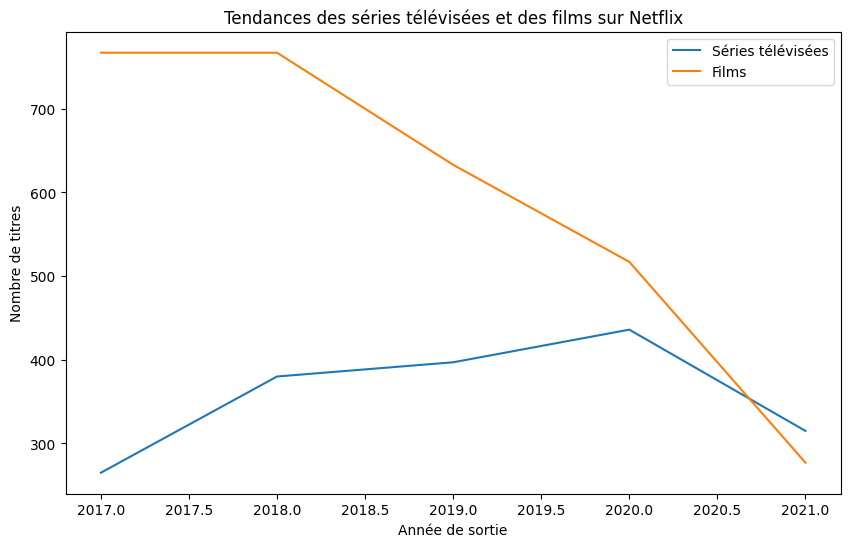

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('netflix.csv')

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

max_year = df['release_year'].max()
recent_years = datetime(max_year, 1, 1) - pd.DateOffset(years=4)
df = df[df['release_year'] >= recent_years.year]

series_count = df[df['type'] == 'TV Show'].groupby('release_year').size()
movie_count = df[df['type'] == 'Movie'].groupby('release_year').size()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(series_count.index, series_count.values, label='Séries télévisées')
ax.plot(movie_count.index, movie_count.values, label='Films')
ax.legend()
ax.set_xlabel('Année de sortie')
ax.set_ylabel('Nombre de titres')
ax.set_title('Tendances des séries télévisées et des films sur Netflix')
plt.show()